## KNN k nearest  neighbors-- classification

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('E:\\All Datasets\\gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## EDA

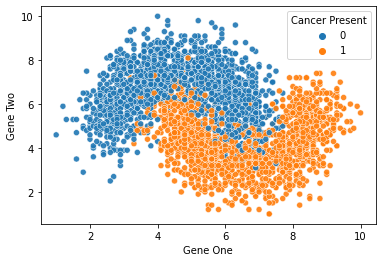

In [23]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.9)
# what is alpha  alpha is darknes of points
plt.show()

In [24]:
df.shape

(3000, 3)

In [25]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


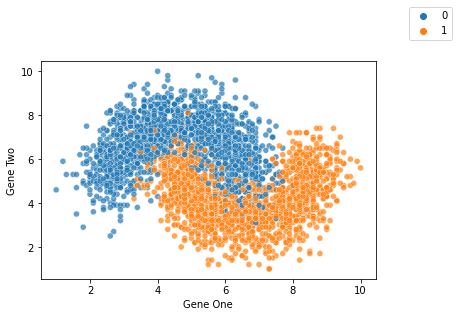

In [26]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.7)
plt.legend(loc=(1.1,1.1))  # this tell position of the legend

In [27]:
df.head(3)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1


## x and y

In [28]:
x=df.drop('Cancer Present',axis=1)    # column droping
y=df['Cancer Present']

In [29]:
x.head(3)

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9


In [30]:
pd.DataFrame(y.head(3))

,Cancer Present
0,1
1,0
2,1


## Train|test split

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)

In [32]:
x_train.head()    # 70% training

,Gene One,Gene Two
456,3.8,7.3
1345,4.0,6.2
839,9.4,4.9
746,4.4,4.3
1227,5.3,7.5


In [33]:
x_test.head()      #30% testing

,Gene One,Gene Two
465,4.5,3.4
904,5.0,3.8
2639,5.8,7.3
2125,5.7,3.6
1962,3.4,7.3


In [34]:
y_train   # y variable is not in dataframe it is in series form

456     0
1345    0
839     1
746     1
1227    0
       ..
2416    1
48      1
772     1
1848    1
1231    0
Name: Cancer Present, Length: 2100, dtype: int64

0.006191307866537337

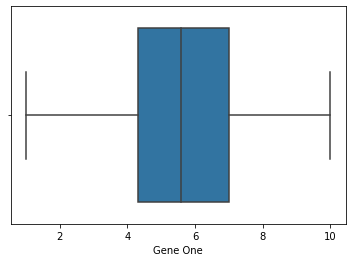

In [39]:
sns.boxplot(data=df,x=x_train['Gene One'])
(x_train['Gene One']).skew()

## Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# data point in between -1 to +1

<AxesSubplot:>

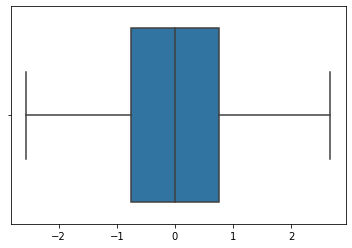

In [41]:
sns.boxplot(data=df,x=x_train)

## Modelling

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_model= KNeighborsClassifier(n_neighbors=1)    # k is here 1

knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## model evaluation

In [18]:
y_pred=knn_model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
# here comparing actual value and predicted value
accuracy_score(y_test,y_pred)    # 1st take test and then 2nd pred

0.9022222222222223

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[413,  37],
       [ 51, 399]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       464
           1       0.89      0.92      0.90       436

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



## elbow method for choosing best k values

In [70]:
test_ac=[]

for k in range(1,55):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train)
    y_pred_test=knn_model.predict(x_test)
    test_ac_score = accuracy_score(y_test,y_pred_test)
    
    test_ac.append(test_ac_score)
    
print(test_ac,end=',')

[0.9022222222222223, 0.8855555555555555, 0.9011111111111111, 0.8922222222222222, 0.9077777777777778, 0.9033333333333333, 0.9077777777777778, 0.9055555555555556, 0.91, 0.9122222222222223, 0.9122222222222223, 0.9155555555555556, 0.9144444444444444, 0.9188888888888889, 0.9188888888888889, 0.92, 0.9177777777777778, 0.9166666666666666, 0.9211111111111111, 0.9233333333333333, 0.92, 0.9211111111111111, 0.9211111111111111, 0.9222222222222223, 0.92, 0.9222222222222223, 0.9211111111111111, 0.9222222222222223, 0.9222222222222223, 0.9211111111111111, 0.9211111111111111, 0.9211111111111111, 0.9211111111111111, 0.9222222222222223, 0.9222222222222223, 0.9222222222222223, 0.9233333333333333, 0.9233333333333333, 0.9222222222222223, 0.9211111111111111, 0.9211111111111111, 0.9211111111111111, 0.92, 0.9222222222222223, 0.9211111111111111, 0.9211111111111111, 0.9211111111111111, 0.9222222222222223, 0.92, 0.9233333333333333, 0.9222222222222223, 0.9222222222222223, 0.9222222222222223, 0.9233333333333333],

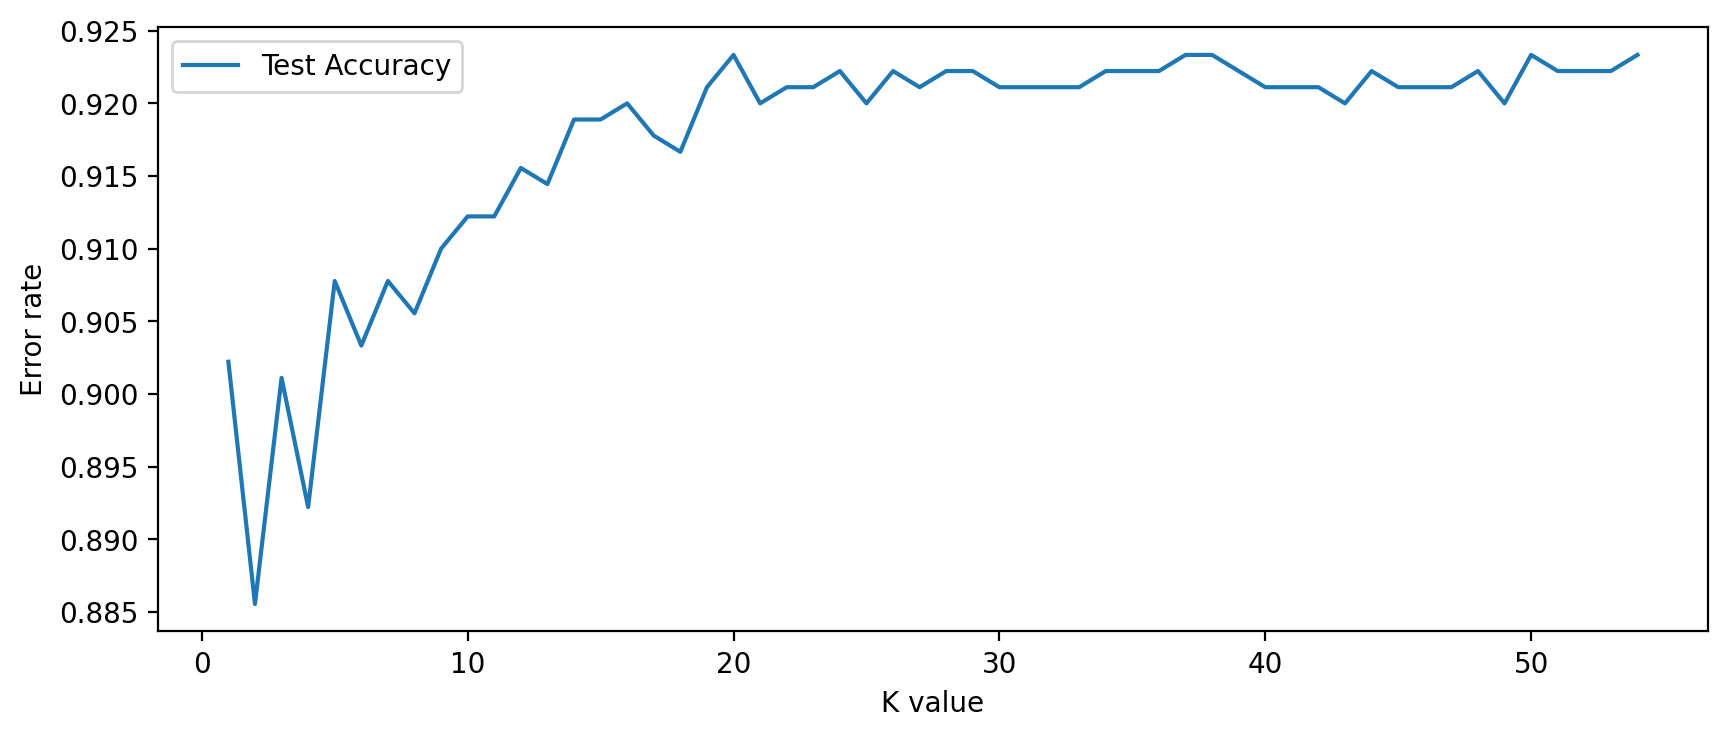

In [67]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(range(1,55),test_ac,label='Test Accuracy')

plt.ylabel('Error rate')
plt.xlabel('K value')

plt.legend()
plt.show()

### Understanding KNN and choosing for k value

**full cross validation grid search for k value**

In [71]:
param_grid ={'n_neighbors': list(range(1,55))}

In [75]:
from sklearn.model_selection import GridSearchCV
full_cv_classifier= GridSearchCV(knn_model,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=54),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [76]:
full_cv_classifier.best_params_

{'n_neighbors': 36}

**final model**

In [80]:
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

In [81]:
accuracy_score(y_test,y_pred)

0.9222222222222223

In [82]:
confusion_matrix(y_test,y_pred)

array([[418,  32],
       [ 38, 412]], dtype=int64)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       450
           1       0.93      0.92      0.92       450

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [84]:
y_pred_train=knn_model.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.9428571428571428